In [139]:
import scanpy as sc

In [140]:
import pandas as pd

In [141]:
print(sc.__version__)

1.10.4


In [142]:
#import velocyto as vcy

In [143]:
#print(vcy.__version__)

In [144]:
#.libPaths()

In [145]:
#library(velocyto.R)

In [146]:
#packageVersion("velocyto.R")

In [147]:
# https://pklab.med.harvard.edu/velocyto/notebooks/R/chromaffin2.nb.html

In [148]:
#library(Seurat)

In [149]:
# multimodal omics data

In [2]:
import muon as mu

In [3]:
mu.read_h5mu("/home/rstudio/run070/run070-nsclc-3.h5mu")

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 5755 × 28948
  var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
  1 modality
    rna:	5755 x 28948
      obs:	'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics'
      obsm:	'X_tsne', 'X_umap'

In [152]:
patient_data070 = mu.read_h5mu("/home/rstudio/run070/run070-nsclc-3.h5mu")

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


## Exploratory analysis

In [153]:
patient_data070.mod['rna'].uns['Pipeline_Metrics']

{'Alignment_Categories':                                                Total_CellLabel_UMI_Reads  \
 Library                                                                    
 Pr416_Pat3TCR_MKDL240011295-1A_22JYTMLT4_L4_1                   60908082   
 Pr416_Pat3WTA_MKDL240011294-1A_22JL3VLT4_L3_1                   36215077   
 Pr416_Pat3WTA_MKDL240011294-1A_22JYTMLT4_L4_1                  202964593   
 Pr416_Pat3WTA_MKDL240011294-1A_22MKKNLT3_L6_1                    9100962   
 Combined_stats                                                 309188714   
 
                                                Annotated_Transcriptome_Pct  \
 Library                                                                      
 Pr416_Pat3TCR_MKDL240011295-1A_22JYTMLT4_L4_1                         0.12   
 Pr416_Pat3WTA_MKDL240011294-1A_22JL3VLT4_L3_1                        54.80   
 Pr416_Pat3WTA_MKDL240011294-1A_22JYTMLT4_L4_1                        54.38   
 Pr416_Pat3WTA_MKDL240011294-1A_22MKKNLT

In [154]:
# - RSEC (Recursive Substitution Error Correction) - molecule count correction

In [155]:
# Cell_Type_Experimental

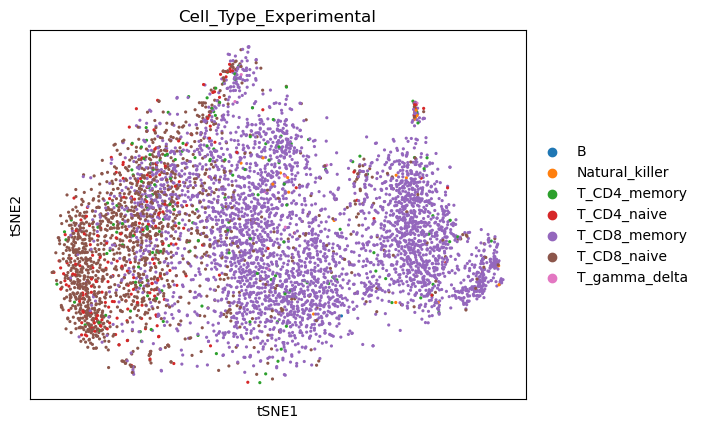

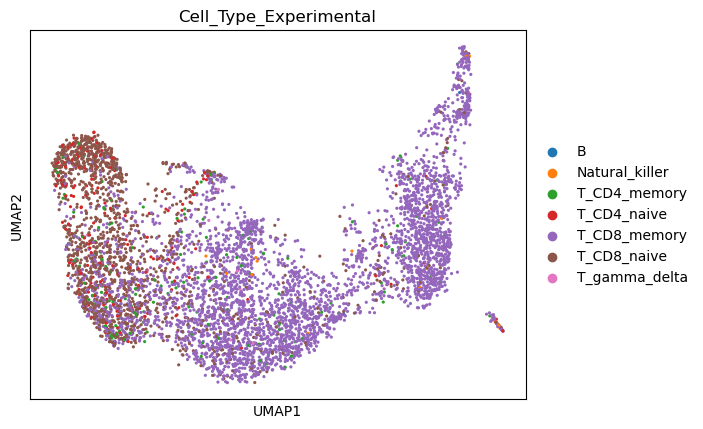

In [156]:
sc.pl.tsne(patient_data070.mod['rna'], color='Cell_Type_Experimental')
sc.pl.umap(patient_data070.mod['rna'], color='Cell_Type_Experimental')

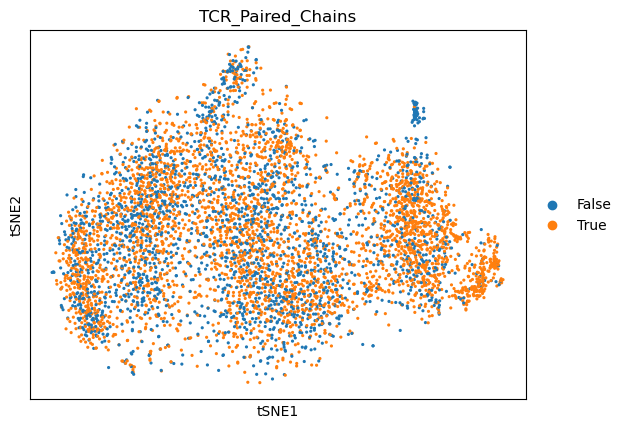

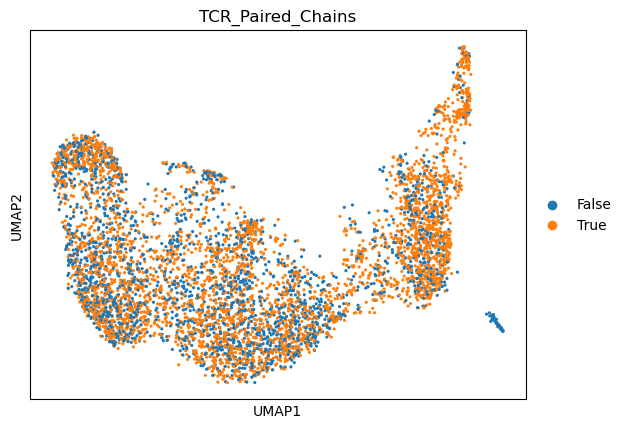

In [157]:
sc.pl.tsne(patient_data070.mod['rna'], color='TCR_Paired_Chains')
sc.pl.umap(patient_data070.mod['rna'], color='TCR_Paired_Chains')

In [158]:
# alpha beta diversity

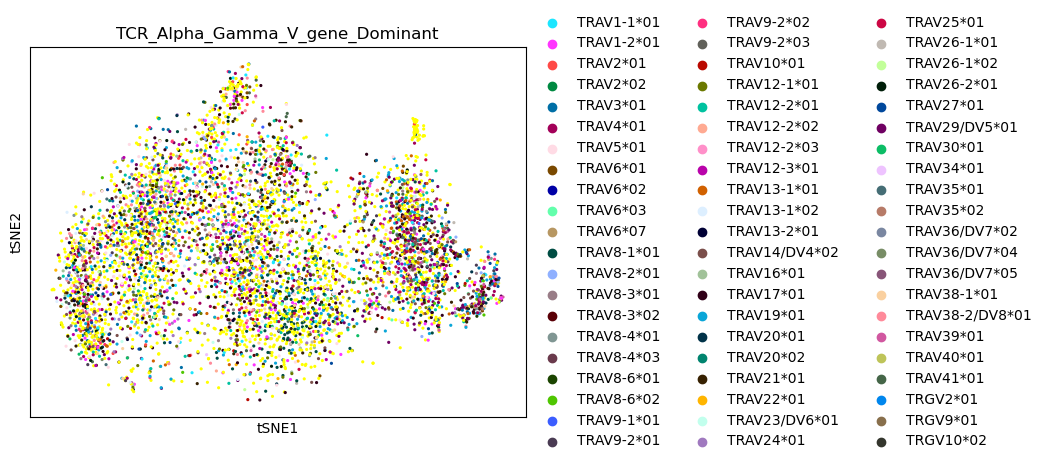

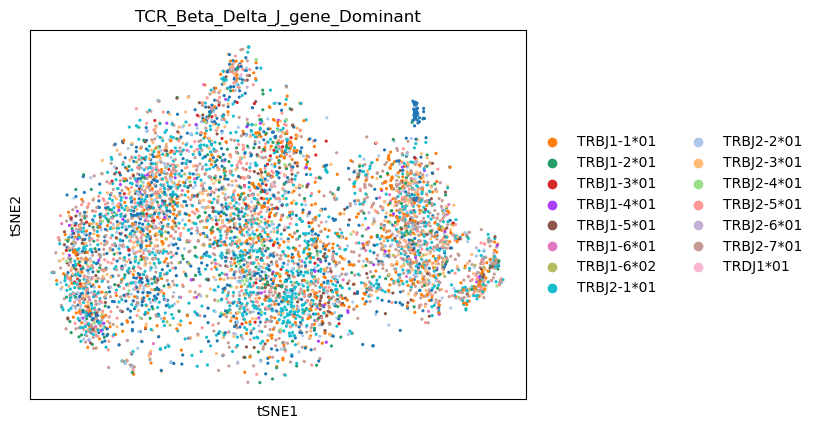

In [159]:
sc.pl.tsne(patient_data070.mod['rna'], color='TCR_Alpha_Gamma_V_gene_Dominant')
sc.pl.tsne(patient_data070.mod['rna'], color='TCR_Beta_Delta_J_gene_Dominant')

In [160]:
# Cool way of visualizing
with mu.set_options(display_style = "html", display_html_expand = 0b000):
    display(patient_data070)

MuData object with n_obs × n_vars = 5755 × 28948
  var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
  1 modality
    rna:	5755 x 28948
      obs:	'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'TCR_Paired_Chains_colors', 'TCR_Alpha_Gamma_V_gene_Dominant_colors', 'TCR_Beta_Delta_J_gene_Dominant_colors'
      obsm:	'X_tsne', 'X_umap'

## Processing

In [161]:
rna = patient_data070.mod['rna']
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
rna.var["mt"] = rna.var_names.str.startswith("MT-")
# ribosomal genes
rna.var["ribo"] = rna.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
rna.var["hb"] = rna.var_names.str.contains("^HB[^(P)]")

In [162]:
sc.pp.calculate_qc_metrics(
    rna, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

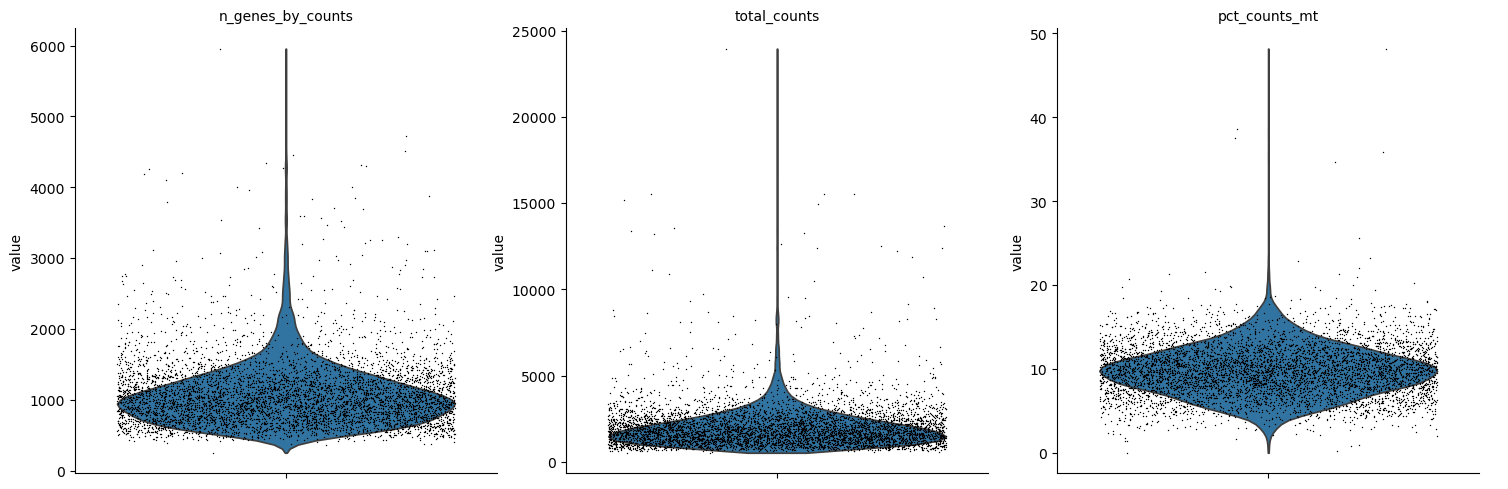

In [163]:
sc.pl.violin(
    rna,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

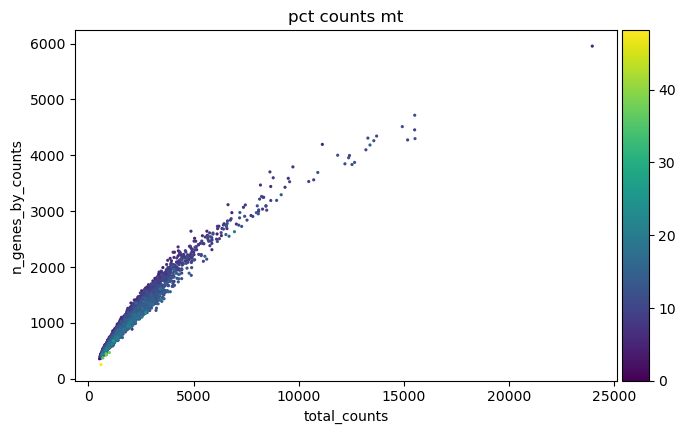

In [164]:
sc.pl.scatter(rna, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [165]:
#filter cells with less than 100 genes expressed and genes that are detected in less than 3 cells.
sc.pp.filter_cells(rna, min_genes=100)
sc.pp.filter_genes(rna, min_cells=3)

In [166]:
rna.obs.columns

Index(['Cell_Type_Experimental', 'Total_VDJ_Read_Count',
       'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant',
       'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant',
       'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant',
       'TCR_Alpha_Gamma_CDR3_Translation_Dominant',
       'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count',
       'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant',
       'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant',
       'TCR_Beta_Delta_CDR3_Nucleotide_Dominant',
       'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count',
       'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains',
       'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
    

In [167]:
!pip install scikit-image

In [168]:
#scikit-image is needed here
# adds doublet score to .obs
#sc.pp.scrublet(rna, batch_key="sample")
sc.pp.scrublet(rna)

In [169]:
# Saving count data
rna.layers["counts"] = rna.X.copy()

In [170]:
# Normalizing to median total counts ## other options are- ten thousand (CP10k) or one million (CPM, counts per million)
sc.pp.normalize_total(rna)
# Logarithmize the data
sc.pp.log1p(rna)

In [171]:
# feature selection
sc.pp.highly_variable_genes(rna, n_top_genes=2000)

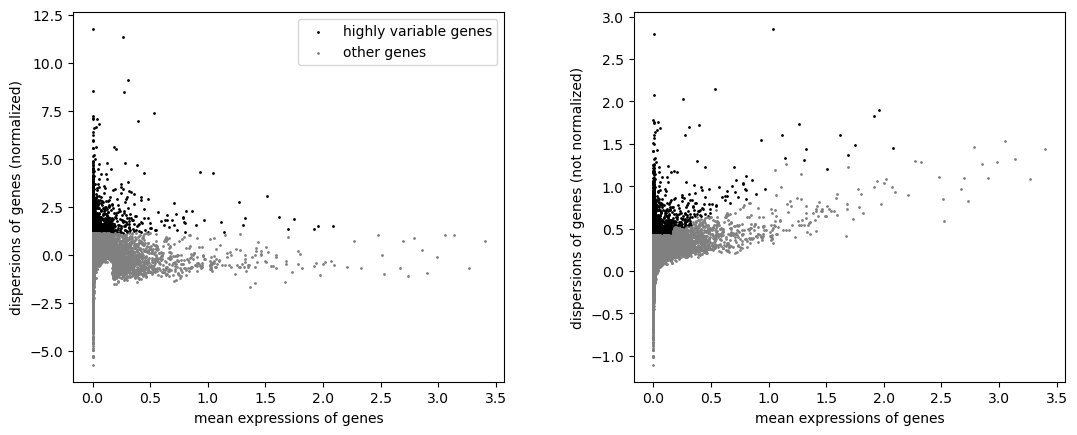

In [172]:
sc.pl.highly_variable_genes(rna)

In [173]:
#pca is not in the mu obj
sc.tl.pca(rna)

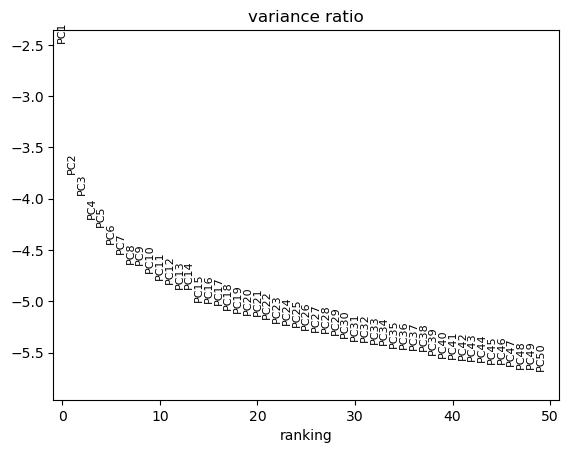

In [174]:
#var. ratio - pca
sc.pl.pca_variance_ratio(rna, n_pcs=50, log=True)

In [175]:
# pc = 15

In [176]:
sc.pp.neighbors(rna, n_neighbors=15, n_pcs=20)

In [177]:
rna

AnnData object with n_obs × n_vars = 5755 × 23691
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_c

In [178]:
# stored here - obsp: 'distances', 'connectivities', uns='neighbors'

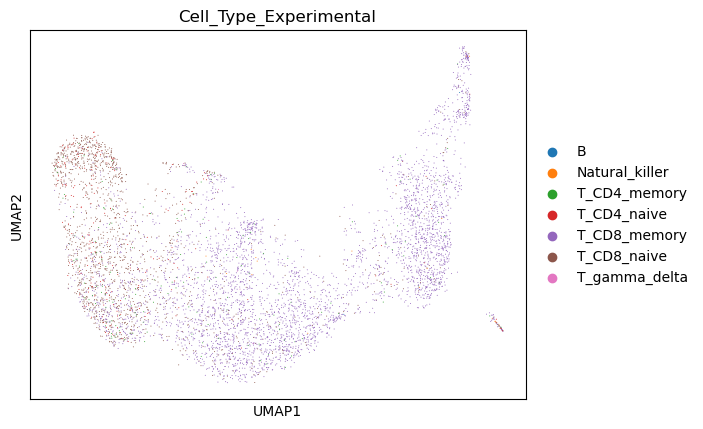

In [179]:
sc.pl.umap(
    rna,
    color="Cell_Type_Experimental",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [180]:
# leiden - clust.
## Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(rna, flavor="igraph", n_iterations=2)

In [181]:
#rna
## leiden= uns

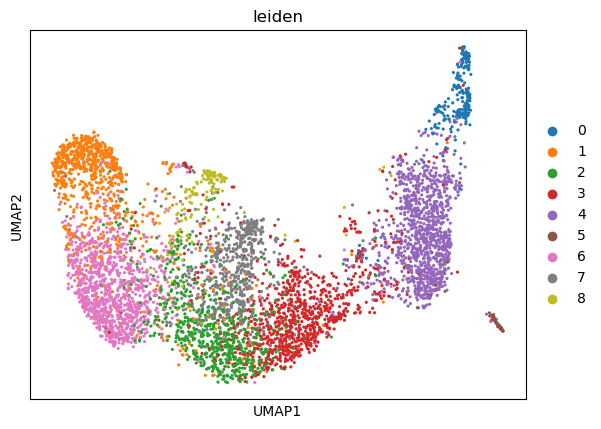

In [182]:
sc.pl.umap(rna, color=["leiden"])

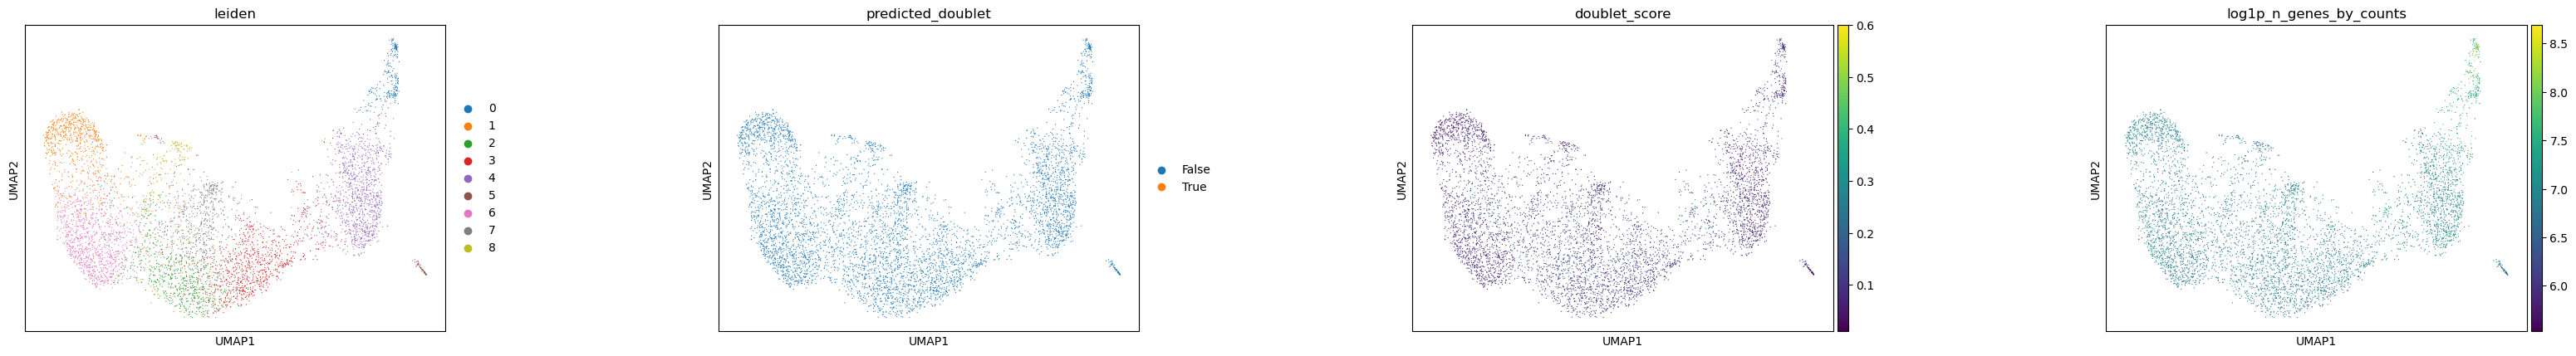

In [183]:
sc.pl.umap(
    rna,
    color=["leiden", "predicted_doublet", "doublet_score", "log1p_n_genes_by_counts"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

In [184]:
# further clustering for cell annotation
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        rna, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

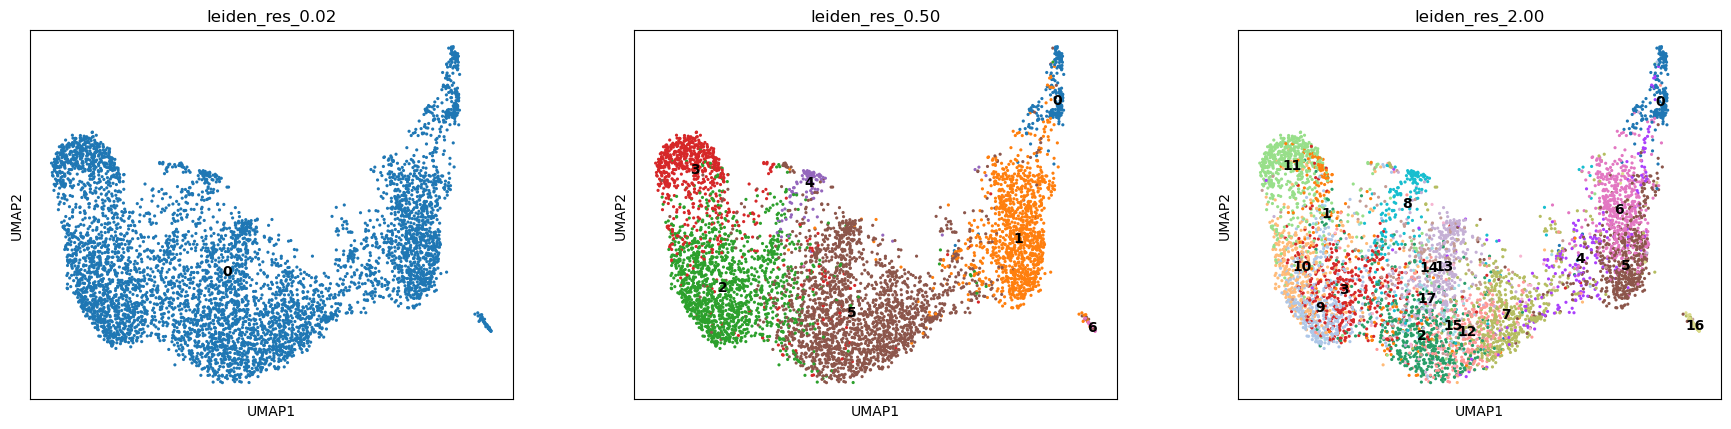

In [185]:
sc.pl.umap(
    rna,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

In [186]:
marker_genes = {
    "B cells": ["Ms4a1", "Cd19"],
    "Monocytes/Macrophages": ["Cd14", "Lyz2", "Fcgr3", "Ms4a7", "Fcer1g", "Cst3", "H2-Aa", "Ly6d"],
    "rRNA": ["AY036118", "Gm42418"],  
    "M phase": ["Cenpa", "Ccnb2", "Birc5", "Mki67"],
    "S phase": ["Pcna", "Mcm3", "Ccne2"],
    "T cells": ["Cd8b", "Cd8a", "Cd4", "Cd3g", "Cd3e", "Cd3d"]
}

In [187]:
#sc.pl.dotplot(rna, marker_genes, groupby="leiden_res_2.00", standard_scale="var")
#sc.pl.dotplot(rna, marker_genes, groupby="leiden_res_0.50", standard_scale="var")

In [188]:
# supervised method

In [189]:
marker_genes_upper = {
    k: [g.upper() for g in v] for k, v in marker_genes.items()
}

#sc.pl.dotplot(rna, marker_genes_upper, groupby="leiden_res_2.00", standard_scale="var")
#sc.pl.dotplot(rna, marker_genes_upper, groupby="leiden_res_0.50", standard_scale="var")

In [190]:
all_markers = [g for genes in marker_genes_upper.values() for g in genes] # return g for genese in .values() and append to all markers
missing = [g for g in all_markers if g not in rna.var_names]
print("Missing marker genes:", missing)

Missing marker genes: ['CD19', 'LYZ2', 'FCGR3', 'MS4A7', 'H2-AA', 'LY6D', 'AY036118', 'GM42418']


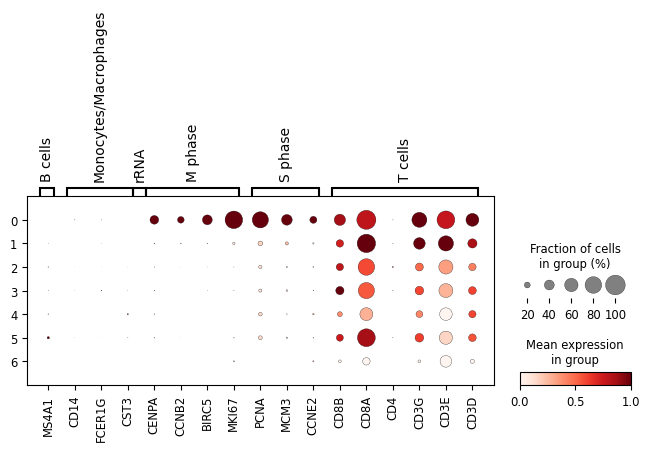

In [191]:
marker_genes_filtered = {
    k: [g for g in v if g not in missing]
    for k, v in marker_genes_upper.items()
}

sc.pl.dotplot(rna, marker_genes_filtered, groupby="leiden_res_0.50", standard_scale="var")

In [192]:
# unsupervised method

In [193]:
# wilcoxon - comp. cluster vs rest
## Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(rna, groupby="leiden_res_0.50", method="wilcoxon")

In [194]:
rna

AnnData object with n_obs × n_vars = 5755 × 23691
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_c

In [195]:
rna.uns["rank_genes_groups"]["names"].dtype.names # 6 clusters as per umap plot

('0', '1', '2', '3', '4', '5', '6')

In [196]:
sc.get.rank_genes_groups_df(rna, group="3").head(5)

names     scores  logfoldchanges          pvals      pvals_adj
0  PABPC1  24.361254        1.070465  4.405373e-131  3.478923e-127
1    RPS6  23.512861        1.019915  3.012895e-122  1.427570e-118
2  EEF1A1  22.770111        0.758693  9.071524e-115  3.581891e-111
3   RPS13  22.763035        1.023195  1.066076e-114  3.608059e-111
4   RPL34  22.679779        0.925342  7.094319e-114  2.100894e-110

In [197]:
sc.get.rank_genes_groups_df(rna, group="3").tail(5)

names     scores  logfoldchanges          pvals      pvals_adj
23686  HLA-B -20.925678       -0.419617   3.125881e-97   6.171270e-94
23687   CD74 -22.316282       -2.009389  2.567787e-110  6.759270e-107
23688  DUSP4 -23.596548       -4.500629  4.181765e-123  2.476755e-119
23689  ZFP36 -24.424515       -1.642110  9.390516e-132  1.112354e-127
23690   CCL5 -24.545362       -3.164994  4.847374e-133  1.148391e-128

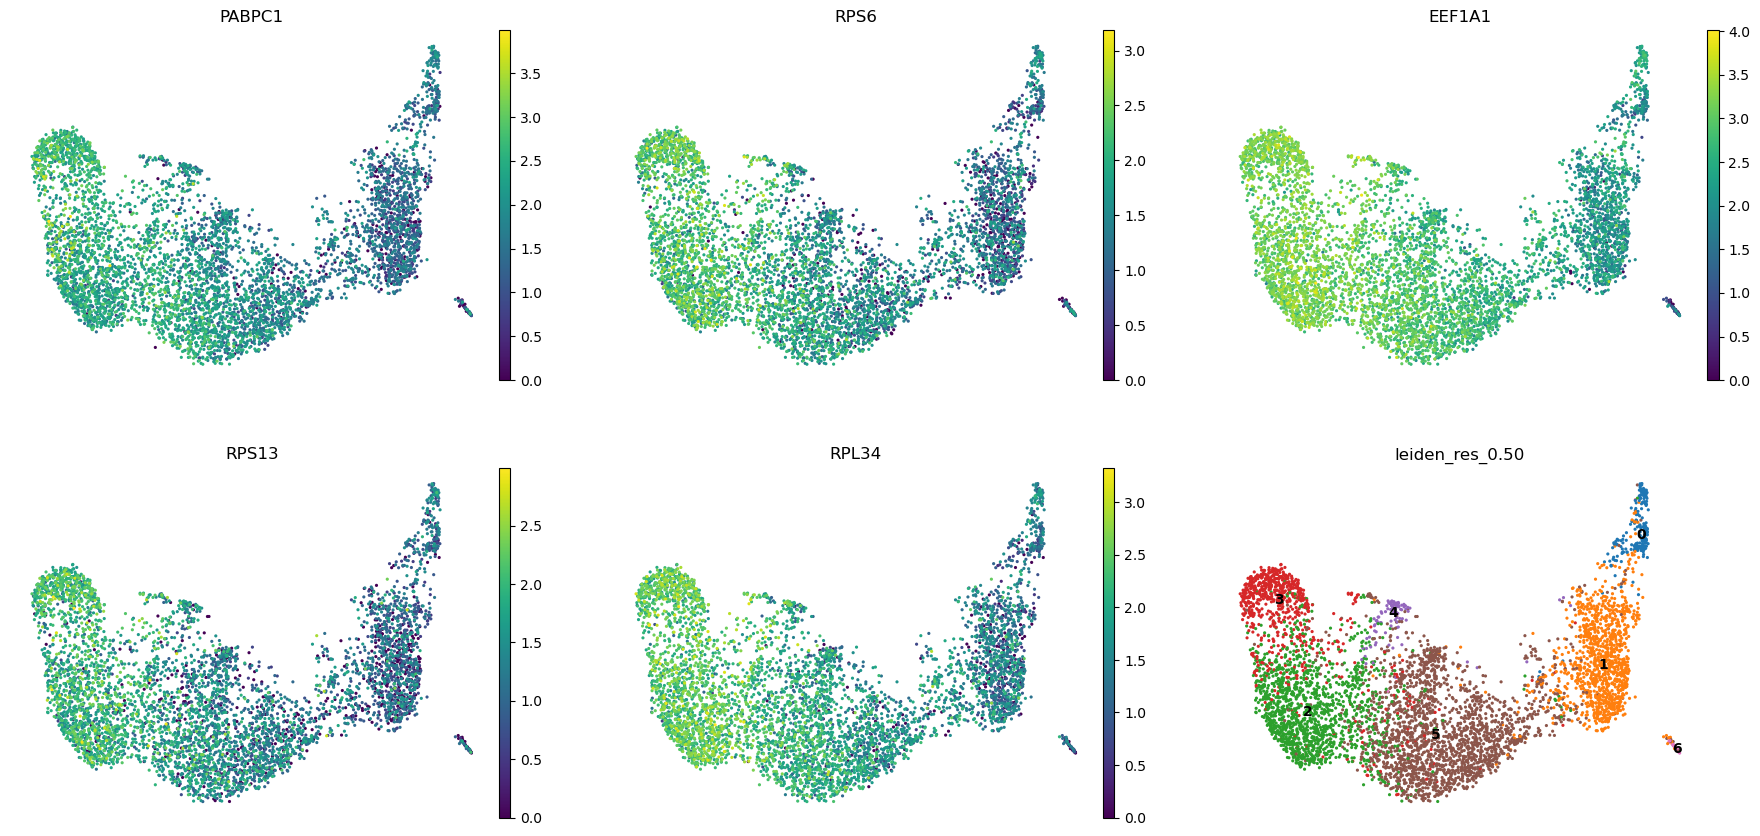

In [198]:
dc_cluster_genes = sc.get.rank_genes_groups_df(rna, group="3").head(5)["names"]
sc.pl.umap(
    rna,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)

In [199]:
# use .var_names_make_unique() if multi modalities with same var name present

### Preprocessing and clustering 3k PBMCs (legacy workflow)

In [200]:
result = rna.uns["rank_genes_groups"]
groups = result["names"].dtype.names
pd.DataFrame(
    {
        f"{group}_{key[:1]}": result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(5)

0_n            0_p       1_n            1_p     2_n            2_p  \
0   HMGN2  3.506304e-122     DUSP4   0.000000e+00  EEF1A1  8.427772e-239   
1    TUBB  1.410766e-121      CCL5  1.650678e-225    FTH1  7.135565e-237   
2   STMN1  9.115166e-117      RBPJ  5.543782e-222   RPL34  1.655502e-226   
3  TUBA1B  2.189369e-112  HLA-DRB1  6.375882e-201   ANXA1  7.953903e-221   
4   HMGB2  2.143046e-105      RGS1  2.406876e-186    TPT1  6.818152e-219   

      3_n            3_p       4_n           4_p    5_n            5_p  \
0  PABPC1  4.405373e-131    HSPA1A  3.240652e-47  DUSP2  1.134831e-169   
1    RPS6  3.012895e-122      FOSB  8.371682e-36   GZMK  3.732681e-118   
2  EEF1A1  9.071524e-115  HSP90AA1  8.394767e-36   CCL5   1.042662e-77   
3   RPS13  1.066076e-114    HSPA1B  2.184209e-30   BTG1   1.051078e-77   
4   RPL34  7.094319e-114    DNAJB1  7.322381e-30  RUNX3   3.173097e-77   

         6_n           6_p  
0      PDE3B  1.129865e-24  
1  LINC-PINT  3.969993e-20  
2     MALAT1  1.206463e-15  
3      SYTL3  2.592683e-12  
4       SIK3  7.571691e-11

In [201]:
# can I use premade database to group these into bio. groups?

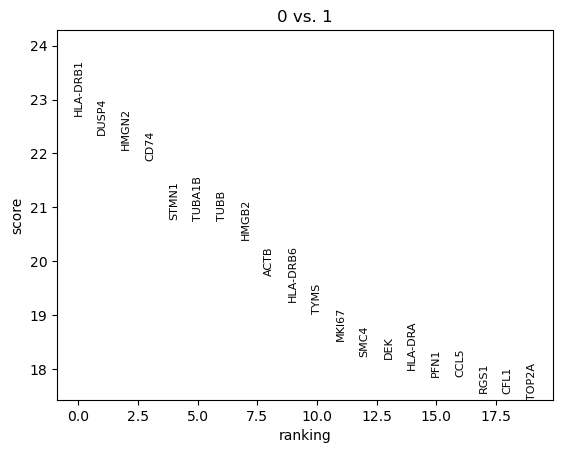

In [202]:
# comparing single clusters ## here cluster 0 vs cluster 1
sc.tl.rank_genes_groups(rna, "leiden", groups=["0"], reference="1", method="wilcoxon")
sc.pl.rank_genes_groups(rna, groups=["0"], n_genes=20)

In [203]:
rna.obs["leiden_res_0.50"].unique()
cluster_ids = rna.obs["leiden_res_0.50"].unique().tolist()

Comparing cluster 0 vs cluster 2


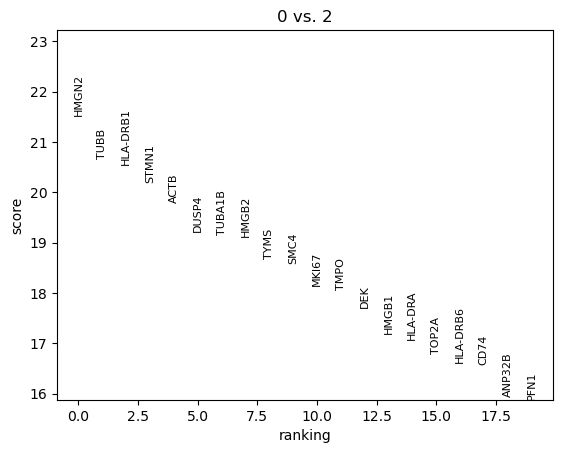

Comparing cluster 0 vs cluster 5


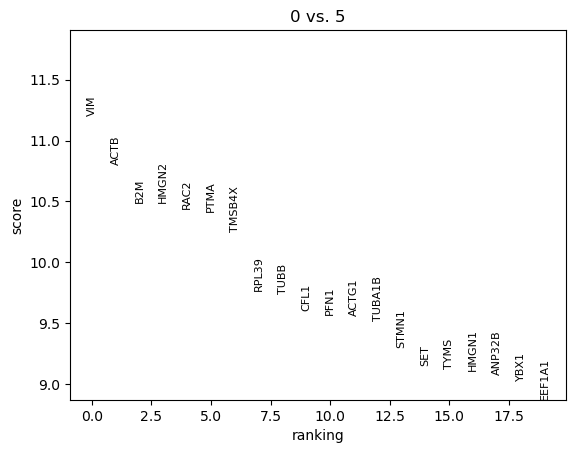

Comparing cluster 0 vs cluster 1


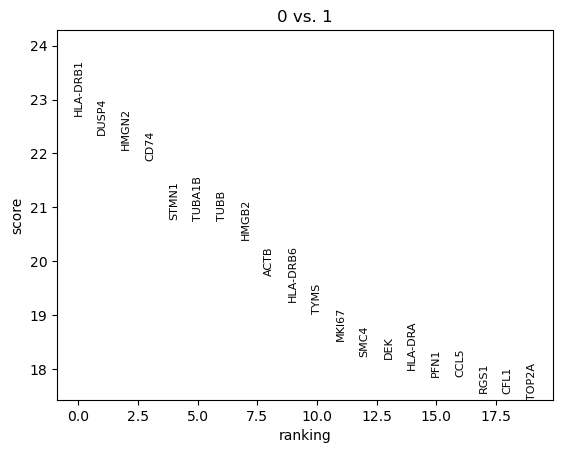

Comparing cluster 0 vs cluster 3


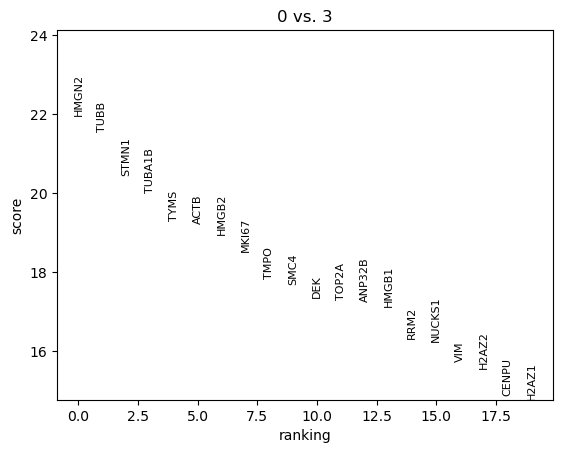

Comparing cluster 0 vs cluster 6


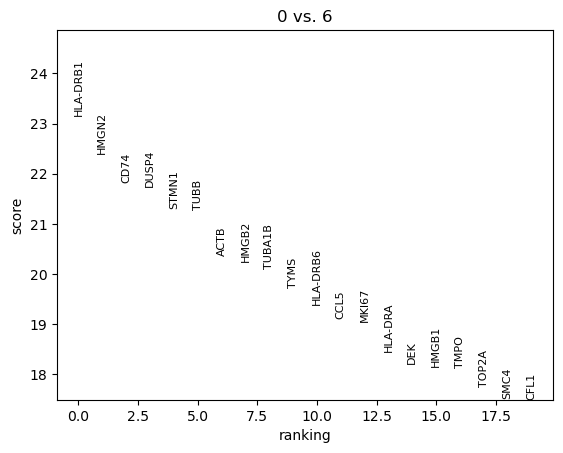

Comparing cluster 0 vs cluster 4


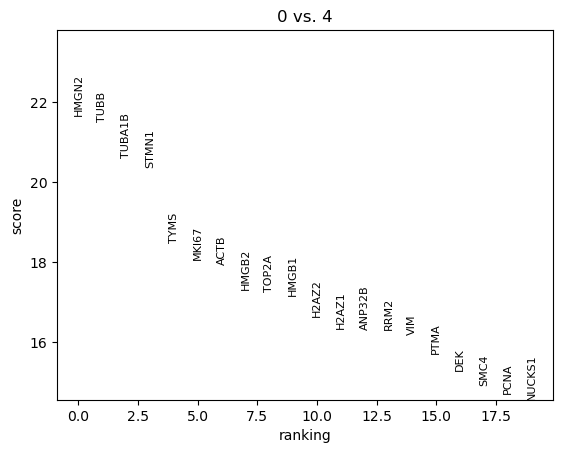

Comparing cluster 2 vs cluster 5


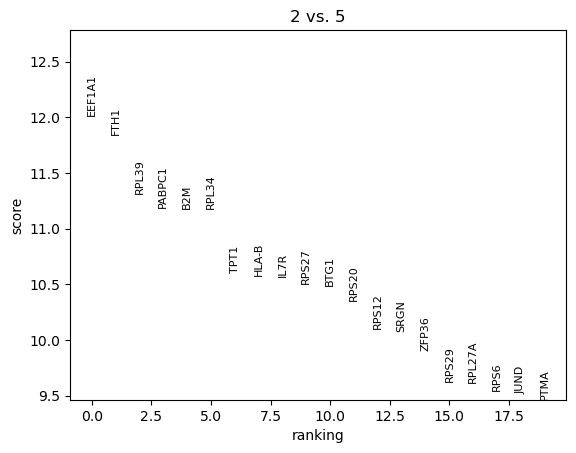

Comparing cluster 2 vs cluster 1


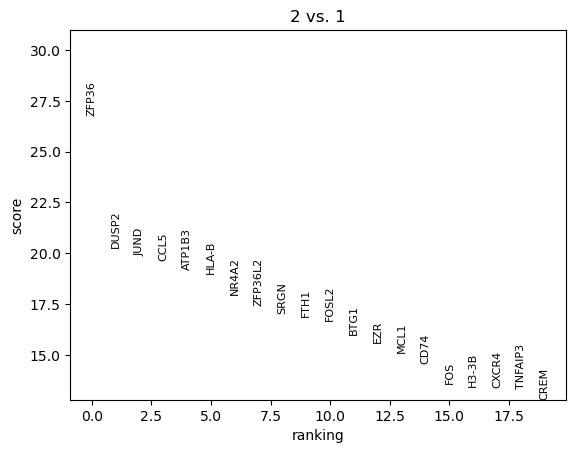

Comparing cluster 2 vs cluster 3


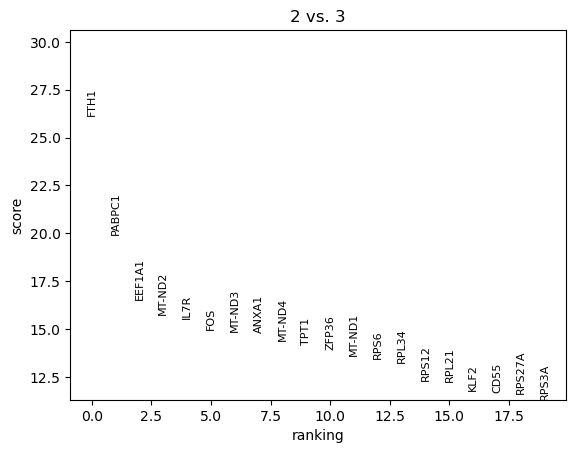

Comparing cluster 2 vs cluster 6


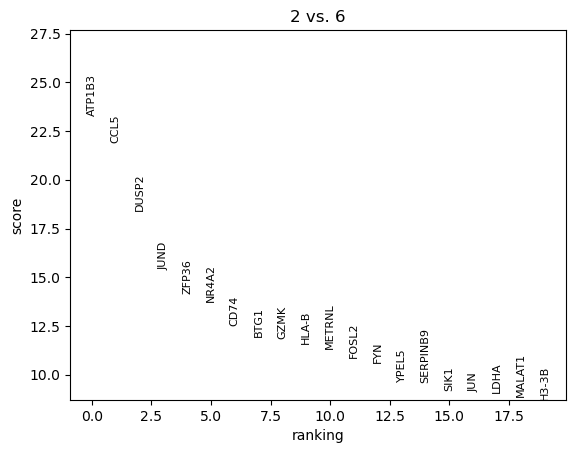

Comparing cluster 2 vs cluster 4


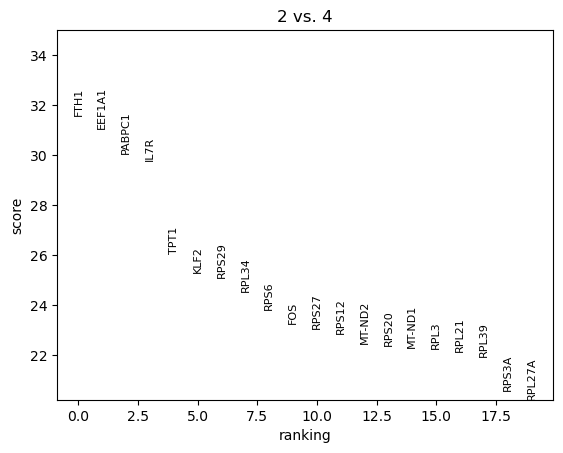

Comparing cluster 5 vs cluster 1


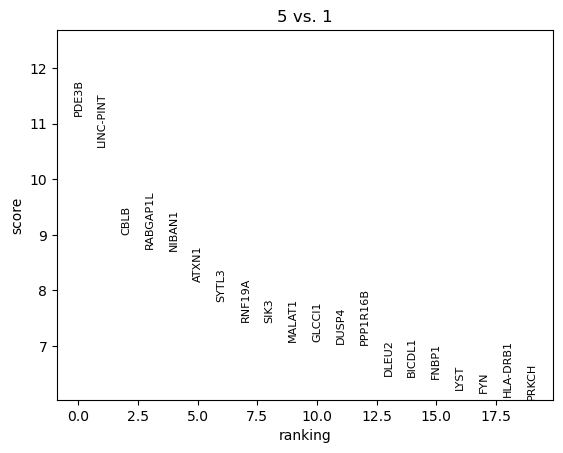

Comparing cluster 5 vs cluster 3


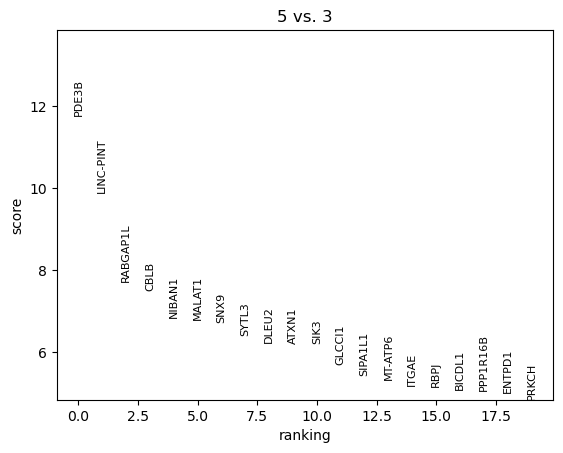

Comparing cluster 5 vs cluster 6


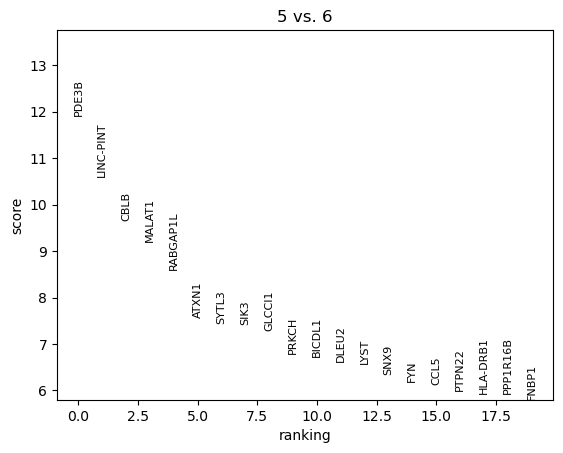

Comparing cluster 5 vs cluster 4


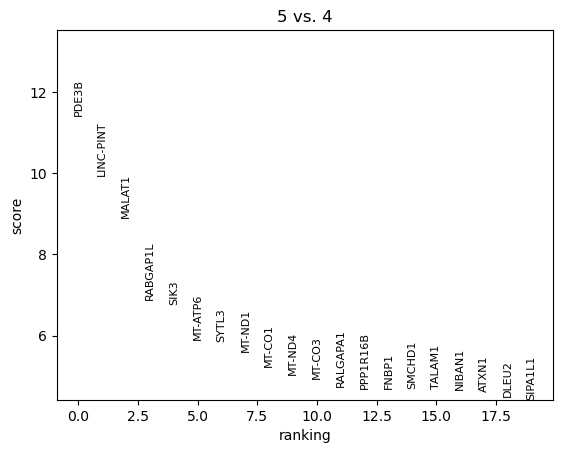

Comparing cluster 1 vs cluster 3


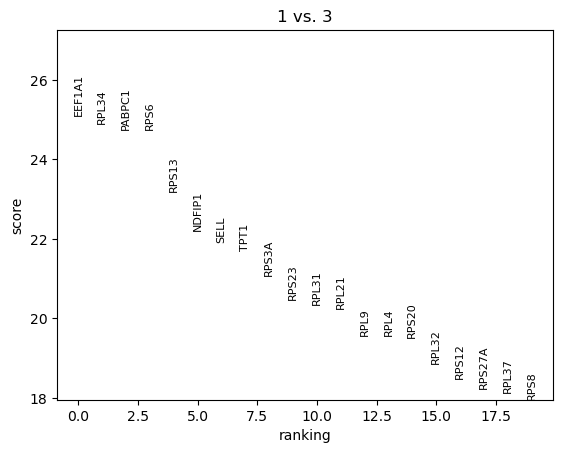

Comparing cluster 1 vs cluster 6


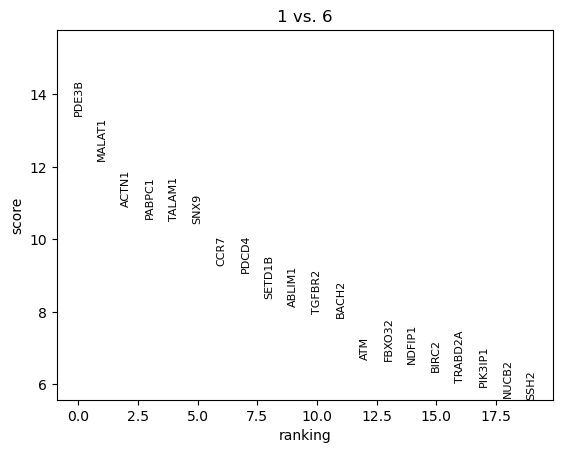

Comparing cluster 1 vs cluster 4


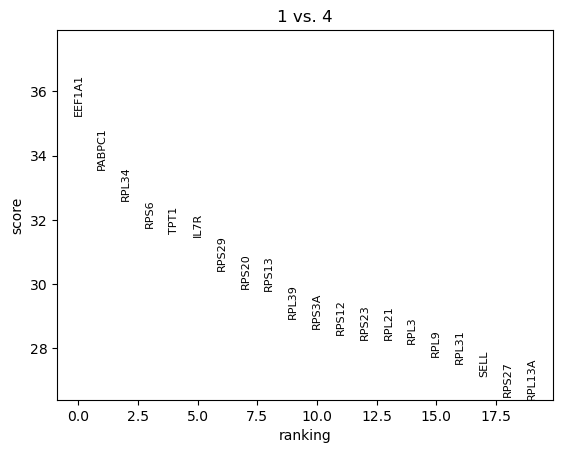

Comparing cluster 3 vs cluster 6


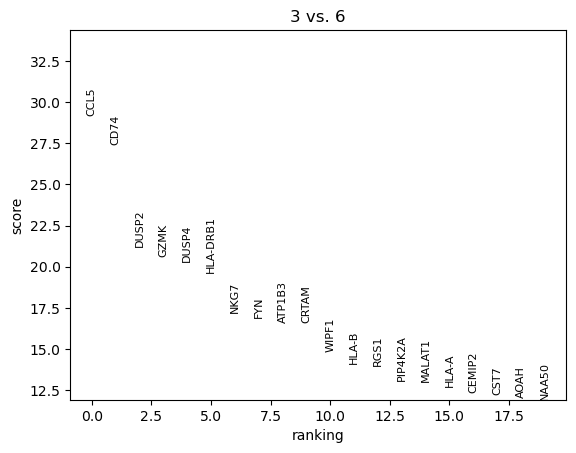

Comparing cluster 3 vs cluster 4


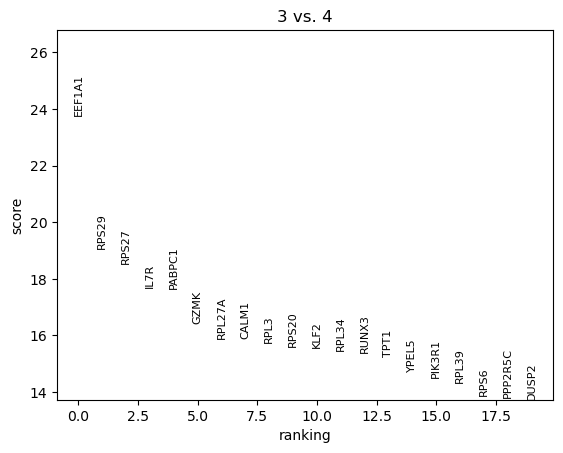

Comparing cluster 6 vs cluster 4


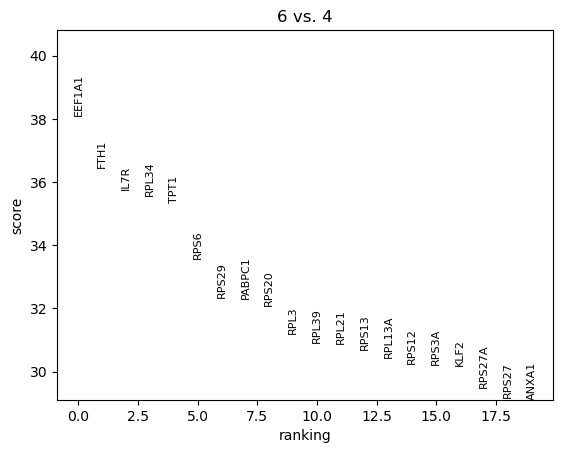

In [204]:
from itertools import combinations

for i, j in combinations(cluster_ids, 2):
    print(f"Comparing cluster {i} vs cluster {j}")
    sc.tl.rank_genes_groups(rna, "leiden", groups=[i], reference=j, method="wilcoxon")
    sc.pl.rank_genes_groups(rna, groups=[i], n_genes=20, show=True)


/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/scanpy/plotting/_tools/__init__.py:1314: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


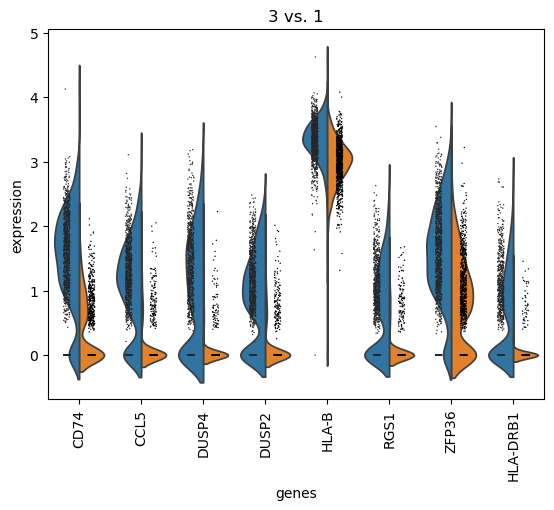

In [205]:
# violin plots ## clus - 3 against cluster 1
sc.tl.rank_genes_groups(rna, groupby="leiden", groups=["3"], reference="1", method="wilcoxon")
sc.pl.rank_genes_groups_violin(rna, groups="3", n_genes=8)

In [206]:
rna

AnnData object with n_obs × n_vars = 5755 × 23691
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_c

In [207]:
# save step # .raw attribute
rna.raw = rna
rna.raw.to_adata().write("./patient070_withoutX.h5ad")

In [208]:
# BBKNN is a fast and intuitive batch effect removal tool that can be directly used in the scanpy workflow. 
##It serves as an alternative to scanpy.pp.neighbors()
### Equivalent to rpca integration
#### Also harmony, mnn, scVI (DL) - external mods
#####cca is more correction, rpca assumes pca and then corrects lightly?
######bbknn also assumes pca & quick neighbourhood graph correction
#######Integration - shared cell types, trajectories

### Steps

1. Processing

2. Normalize --equivalent to SCTransform for both patient data

3. TCR data using scirpy

4. Normalize

4. Integrate both objects

# Ingest integ.

### Adding a new patient to an existing annotated atlas

In [209]:
import anndata
import scanpy as sc
import pandas as pd

In [210]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor="white")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
anyio                       NA
array_api_compat            1.11.2
arrow                       1.3.0
asttokens                   NA
attr                        25.3.0
attrs                       25.3.0
awkward                     2.8.1
awkward_cpp                 NA
babel                       2.17.0
backports                   NA
brotli                      1.1.0
certifi                     2025.01.31
cffi                        1.17.1
charset_normalizer          3.4.1
cloudpickle                 3.1.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dask                        2025.3.0
dateutil                    2.9.0.post0
debugpy                     1.8.13
decorator                   5.2.1
defusedxml                  0.7.1
entrypoints            

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


In [211]:
sc.pp.filter_cells(rna, min_genes=200)
sc.pp.filter_genes(rna, min_cells=3)
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)
sc.pp.highly_variable_genes(rna, n_top_genes=2000, subset=True)
sc.pp.scale(rna, max_value=10)
sc.tl.pca(rna, svd_solver='arpack')
sc.pp.neighbors(rna)
sc.tl.umap(rna)
sc.tl.leiden(rna)

In [212]:
# patient 2
patient_data071 = mu.read_h5mu("/home/rstudio/run071/run071-nsclc-4.h5mu")
rna_2 = patient_data071.mod['rna']

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [213]:
rna_2

AnnData object with n_obs × n_vars = 804 × 22940
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell'
    var: 'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
    uns: 'Pipeline_Inputs', 'Pipeline_Metrics'
    obsm: 'X_tsne', 'X_umap'

In [214]:
sc.pp.filter_cells(rna_2, min_genes=200)
sc.pp.filter_genes(rna_2, min_cells=3)
sc.pp.normalize_total(rna_2, target_sum=1e4)
sc.pp.log1p(rna_2)

In [215]:
# retain only common genes
common_genes = rna.var_names.intersection(rna_2.var_names)
rna = rna[:, common_genes].copy()
rna_2 = rna_2[:, common_genes].copy()

In [216]:
# ingesting based on leiden clust. alg.
sc.tl.ingest(rna_2, rna, obs='leiden')

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


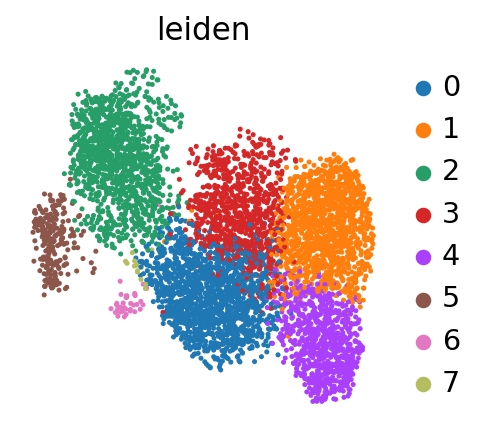

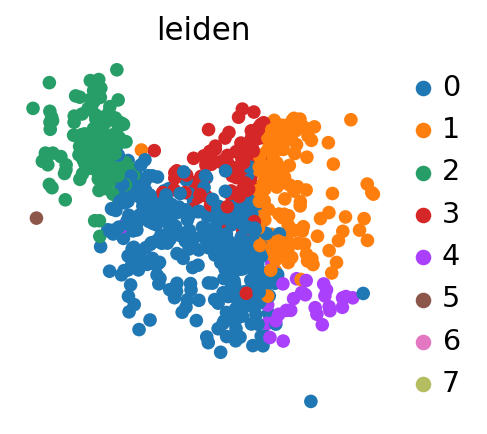

In [217]:
# now using leiden, plot
## patient 2 object now uses patient 1 as reference
### here for leiden - umap
sc.pl.umap(rna, color='leiden')
sc.pl.umap(rna_2, color='leiden')

In [218]:
rna.obs['leiden'].value_counts()

leiden
0    1412
1    1272
2    1179
3     844
4     765
5     230
6      39
7      14
Name: count, dtype: int64

In [219]:
rna_2.obs['leiden'].value_counts()

leiden
0    362
2    156
1    149
3    104
4     30
5      1
6      0
7      0
Name: count, dtype: int64

In [220]:
# maybe the diff. would be more evident with a well annotated set

## BBKNN integ.

In [221]:
rna

AnnData object with n_obs × n_vars = 5755 × 1167
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_co

In [222]:
rna_2

AnnData object with n_obs × n_vars = 802 × 1167
    obs: 'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes', 'leiden'
    var: 'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'n_cells'
    uns: 'Pipeline_Inputs', 'Pipeline_Metrics', 'log1p', 'leiden_colors'
    obsm: 'X_tsn

In [223]:
# adding a batch tag
rna.obs['batch'] = 'patient1'
rna_2.obs['batch'] = 'patient2'

In [224]:
merged_object = rna.concatenate(rna_2, batch_key='batch')

/tmp/ipykernel_1307/1437045195.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  merged_object = rna.concatenate(rna_2, batch_key='batch')
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/anndata/_core/merge.py:1410: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [225]:
#import numpy as np

# Ensure X is dense
#X_dense = merged_object.X.toarray() if hasattr(merged_object.X, "toarray") else merged_object.X

# Now check for NaNs
#nan_cells = np.any(np.isnan(X_dense), axis=1)

# Filter out those cells
#merged_object = merged_object[~nan_cells].copy()

In [226]:
# preprocessing as before
#sc.pp.filter_cells(merged_object, min_genes=200)
#sc.pp.filter_genes(merged_object, min_cells=3)
#sc.pp.normalize_total(merged_object, target_sum=1e4)
#sc.pp.log1p(merged_object)
sc.pp.highly_variable_genes(merged_object, n_top_genes=2000, subset=True)
sc.pp.scale(merged_object, max_value=10)
sc.tl.pca(merged_object, n_comps=20, svd_solver='arpack')
sc.pp.neighbors(merged_object)
sc.tl.umap(merged_object)
sc.tl.leiden(merged_object)

In [228]:
sc.pp.highly_variable_genes(merged_object, n_top_genes=2000, subset=True)
sc.pp.scale(merged_object, max_value=10)
sc.tl.pca(merged_object, n_comps=20, svd_solver='arpack')
sc.pp.neighbors(merged_object)
sc.tl.umap(merged_object)
sc.tl.leiden(merged_object)

In [231]:
!pip install bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 946.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 1.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 2.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=78802 sha256=372038c7898b1cb24feac8a0cafdc09a56585ec36f9887105b38958ff71a1442
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [232]:
sc.external.pp.bbknn(merged_object, batch_key="batch")

In [233]:
sc.tl.umap(merged_object)

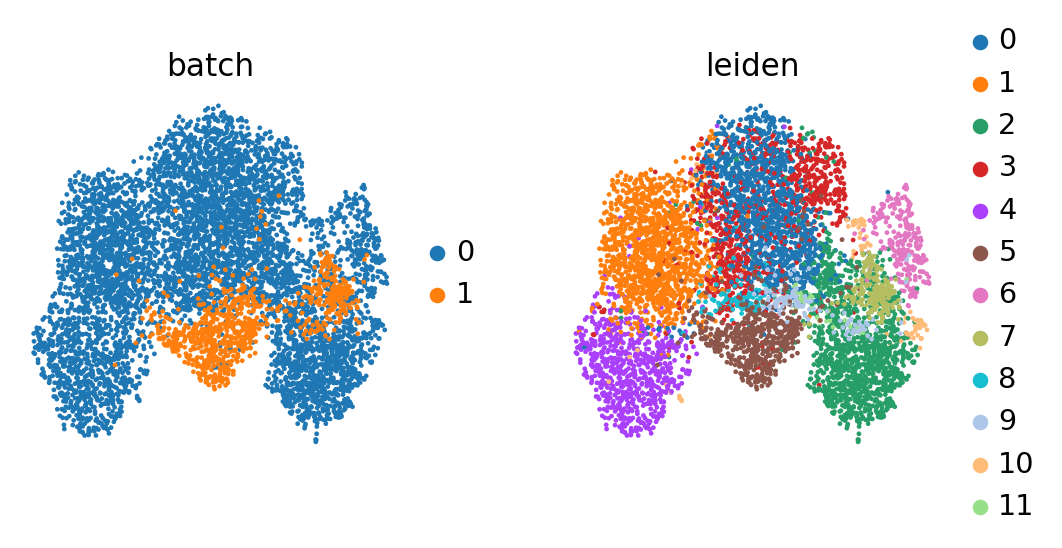

In [235]:
sc.pl.umap(merged_object, color=["batch", "leiden"])

In [239]:
# 0 is reference and 1 is the new dataset
## Need better labelling
### good batch correction here, in ingest-based plot the boundaries were shifted slightly, maybe not true integration like here
#### ingest maybe good for classification acc. to a refrence

In [227]:
from scipy import sparse
sparse.issparse(merged_object.X)

False

## Cell types conserved across batches

In [240]:
print(rna_2.obs.columns)

Index(['Cell_Type_Experimental', 'Total_VDJ_Read_Count',
       'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant',
       'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant',
       'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant',
       'TCR_Alpha_Gamma_CDR3_Translation_Dominant',
       'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count',
       'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant',
       'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant',
       'TCR_Beta_Delta_CDR3_Nucleotide_Dominant',
       'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count',
       'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains',
       'High_Quality_Cell', 'n_genes', 'leiden', 'batch'],
      dtype='object')


In [241]:
# Assigning cell types to a new column in the reference
rna.obs['celltype'] = rna.obs['Cell_Type_Experimental'].astype('category')

In [242]:
# Ingest cell types
## Earlier only leiden was ingested

sc.tl.ingest(rna_2, rna, obs='celltype')

/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/conda/envs/scanpy_v1.10.4_r/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [243]:
rna_2.obs['celltype']

111840      T_CD8_memory
146164      T_CD8_memory
166368       T_CD8_naive
205244      T_CD8_memory
289640      T_CD8_memory
                ...     
56227643    T_CD8_memory
56430280    T_CD8_memory
56491109    T_CD8_memory
56566004    T_CD8_memory
56581982    T_CD8_memory
Name: celltype, Length: 802, dtype: category
Categories (7, object): ['B', 'Natural_killer', 'T_CD4_memory', 'T_CD4_naive', 'T_CD8_memory', 'T_CD8_naive', 'T_gamma_delta']

In [245]:
# checking the no. of cell types in patient1 data ~ rna, which was used as a reference here
rna.obs['Cell_Type_Experimental'].value_counts()

Cell_Type_Experimental
T_CD8_memory      3877
T_CD8_naive       1470
T_CD4_naive        208
T_CD4_memory       169
Natural_killer      21
T_gamma_delta        8
B                    2
Name: count, dtype: int64

In [246]:
rna_2.obs['Cell_Type_Experimental'].value_counts()

Cell_Type_Experimental
T_CD8_memory          568
T_CD4_memory           99
T_CD8_naive            76
T_CD4_naive            24
Natural_killer         23
Monocyte_classical      9
Dendritic               2
B                       1
Name: count, dtype: int64

In [247]:
# rna (patient070) is highly T cell dominant
## might not be suitable for annotating rare cell types such as Monocyte_classical, Dendritic etc. in patient071(rna_2)
### good for cd8 vs cd4 classification

In [250]:
rna_2.obs['celltype_orig'] = rna_2.obs['Cell_Type_Experimental']

In [252]:
# intersected categories
conserved_categories = rna_2.obs["celltype"].cat.categories.intersection(
    rna_2.obs["celltype_orig"].cat.categories
)
# intersect categories
obs_query_conserved = rna_2.obs.loc[
    rna_2.obs["celltype"].isin(conserved_categories)
    & rna_2.obs["celltype_orig"].isin(conserved_categories)
].copy()
# remove unused categories
obs_query_conserved["celltype"] = obs_query_conserved[
    "celltype"
].cat.remove_unused_categories()
# remove unused categories and fix category ordering
obs_query_conserved["celltype_orig"] = obs_query_conserved["celltype_orig"].cat.set_categories(
    obs_query_conserved["celltype"].cat.categories
)

In [253]:
pd.crosstab(obs_query_conserved["celltype"], obs_query_conserved["celltype_orig"])

celltype_orig  T_CD8_memory  T_CD8_naive
celltype                                
T_CD8_memory            535           55
T_CD8_naive              33           21

In [254]:
cm = pd.crosstab(obs_query_conserved["celltype"], obs_query_conserved["celltype_orig"])
accuracy = np.trace(cm.values) / cm.values.sum()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 86.34%


The confusion matrix shows that T_CD8_memory cells were mostly correctly predicted (535 out of 590), while T_CD8_naive cells were frequently misclassified — with only 21 correctly labeled and 55 wrongly assigned as memory. This indicates that the ingest-based label transfer is reliable for CD8 memory cells but less accurate for distinguishing naive CD8 cells, possibly due to transcriptional similarity or underrepresentation in the reference.

## Distributions across batch

In [255]:
sc.tl.embedding_density(merged_object, groupby="batch")

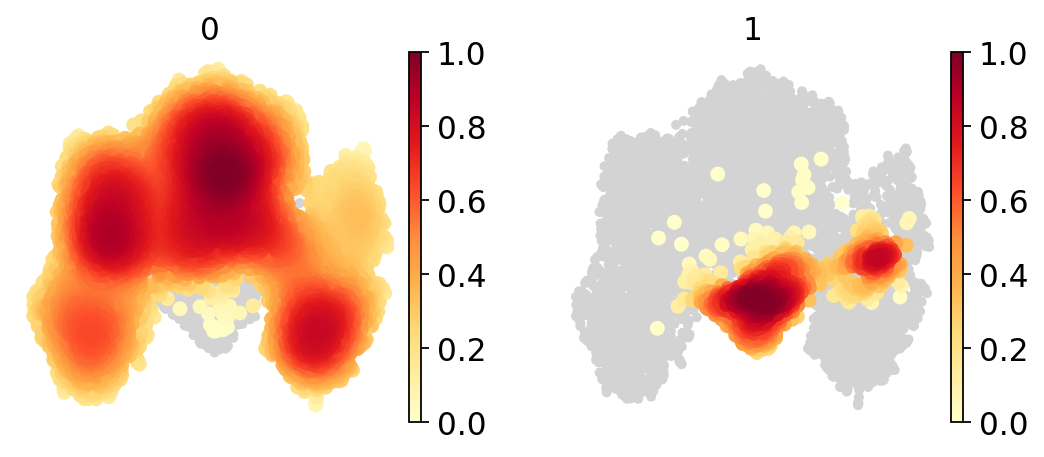

In [256]:
sc.pl.embedding_density(merged_object, groupby="batch")

In [257]:
# Fewer cells and cell type diff. due to that. Not technical batch effect

In [259]:
# scirpy relies on this dependency - pip install python-Levenshtein
## should update scanpy .yml file

In [264]:
#!pip uninstall python-Levenshtein -y
# using conda
!mamba install -y -n scanpy_v1.10.4_r python-Levenshtein

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache
[+] 0.0s
[+] 0.0s

Pinned packages:

  - python=3.10


Transaction

  Prefix: /opt/conda/envs/scanpy_v1.10.4_r

  All requested packages already installed


Transaction starting
[+] 0.0s

Transaction finished



In [300]:
import tarfile
import warnings
from glob import glob

import anndata
import matplotlib.pyplot as plt
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [302]:
#ir.get.airr(rna, "locus", "VJ_1")
#ir.io.read_airr("/home/rstudio/run070/run070-nsclc-3_VDJ_Dominant_Contigs_AIRR.tsv")
patient070_airr = ir.io.read_airr("/home/rstudio/run070/run070-nsclc-3_VDJ_Dominant_Contigs_AIRR.tsv")

In [303]:
patient070_airr

AnnData object with n_obs × n_vars = 5298 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

In [308]:
patient070_airr.obsm["airr"]

<Array [[{c_call: 'TRAC', ...}, ...], ...] type='5298 * var * {c_call: ?str...'>

In [311]:
patient070_airr.obsm["chain_indices"]

<Array [{VJ: [0, ...], VDJ: [...], ...}, ...] type='5298 * {VJ: 2 * ?int64,...'>

In [312]:
ir.tl.chain_qc(patient070_airr)

Stored result in `adata.obs["receptor_type"]`.
Stored result in `adata.obs["receptor_subtype"]`.
Stored result in `adata.obs["chain_pairing"]`.


In [313]:
patient070_airr

AnnData object with n_obs × n_vars = 5298 × 0
    obs: 'receptor_type', 'receptor_subtype', 'chain_pairing'
    uns: 'scirpy_version', 'chain_indices'
    obsm: 'airr', 'chain_indices'

In [306]:
# Analysis

<Axes: title={'center': 'Number of cells in receptor_type by has_ir'}, xlabel='receptor_type', ylabel='Number of cells'>

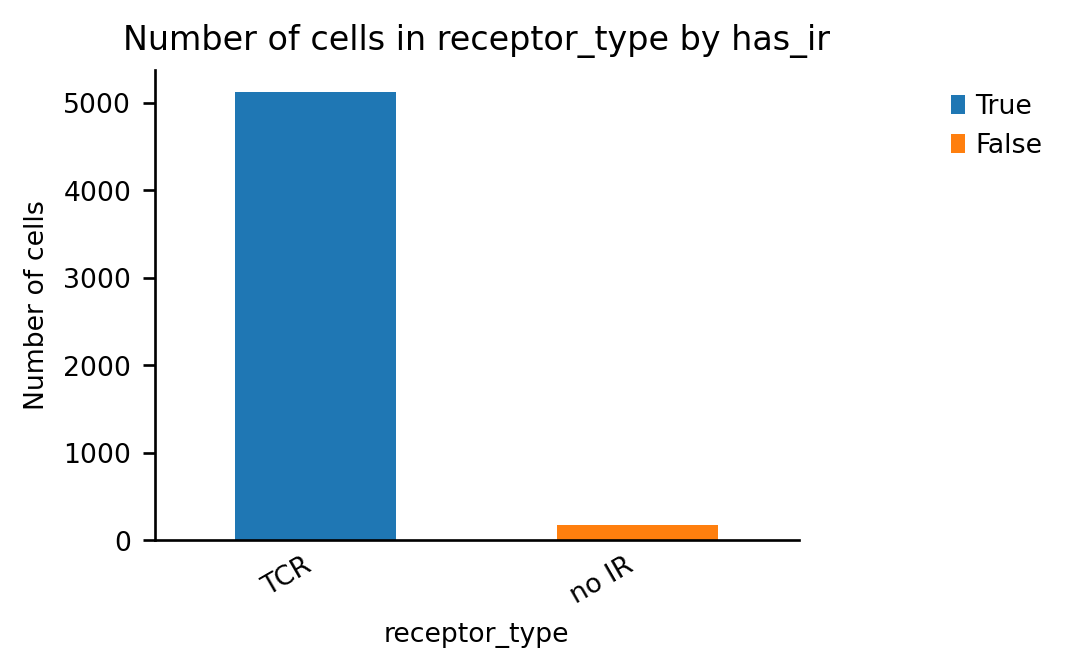

In [321]:
# Receptor type distribution
ir.pl.group_abundance(patient070_airr, groupby="receptor_type")

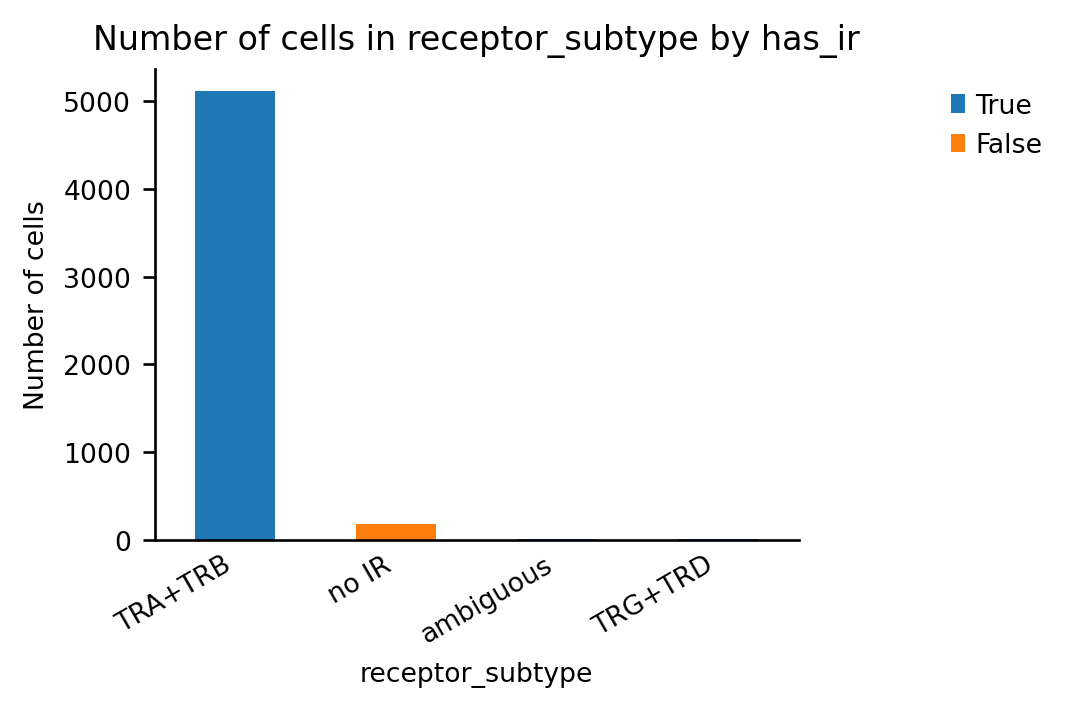

In [317]:
_ = ir.pl.group_abundance(patient070_airr, groupby="receptor_subtype")

<Axes: title={'center': 'Number of cells in chain_pairing by has_ir'}, xlabel='chain_pairing', ylabel='Number of cells'>

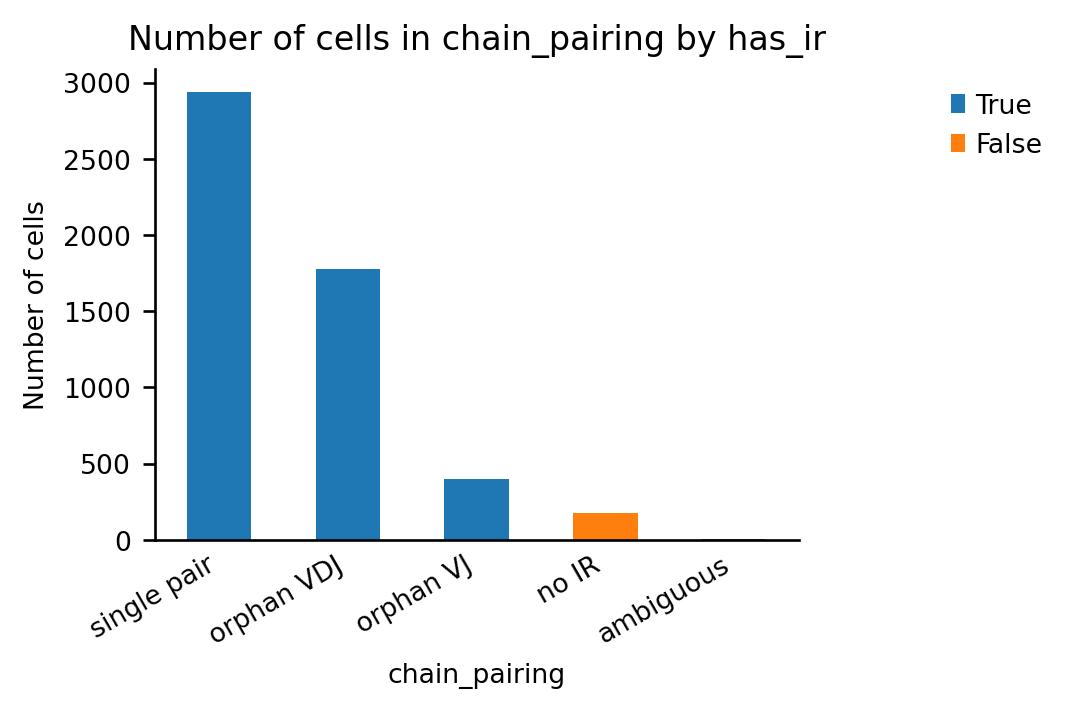

In [318]:
# Chain pairing distribution
ir.pl.group_abundance(patient070_airr, groupby="chain_pairing")

In [304]:
# retrieve the "locus" field of the primary VJ chain for each cell in the patient070 obj.
ir.get.airr(patient070_airr, "locus", "VJ_1")

Filtering chains...
Indexing VJ chains...
Indexing VDJ chains...
build result array


cell_id
4100         TRA
4977        None
11356        TRA
21277        TRA
30102        TRA
            ... 
56515060     TRA
56516968    None
56533009    None
56555682    None
56588651     TRA
Length: 5298, dtype: object

In [333]:
print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(patient070_airr.obs["chain_pairing"].isin(["extra VJ", "extra VDJ", "two full chains", "multichain"]))
        / len(patient070_airr)
    )
)

Fraction of cells with more than one pair of TCRs: 0.00


In [325]:
len(patient070_airr.obsm["airr"])

5298

In [331]:
# Cool way of visualizing
with mu.set_options(display_style = "html", display_html_expand = 0b000):
    display(patient_data070)

MuData object with n_obs × n_vars = 5755 × 28948
  var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton'
  1 modality
    rna:	5755 x 2000
      obs:	'Cell_Type_Experimental', 'Total_VDJ_Read_Count', 'Total_VDJ_Molecule_Count', 'TCR_Alpha_Gamma_V_gene_Dominant', 'TCR_Alpha_Gamma_J_gene_Dominant', 'TCR_Alpha_Gamma_C_gene_Dominant', 'TCR_Alpha_Gamma_CDR3_Nucleotide_Dominant', 'TCR_Alpha_Gamma_CDR3_Translation_Dominant', 'TCR_Alpha_Gamma_Read_Count', 'TCR_Alpha_Gamma_Molecule_Count', 'TCR_Beta_Delta_V_gene_Dominant', 'TCR_Beta_Delta_D_gene_Dominant', 'TCR_Beta_Delta_J_gene_Dominant', 'TCR_Beta_Delta_C_gene_Dominant', 'TCR_Beta_Delta_CDR3_Nucleotide_Dominant', 'TCR_Beta_Delta_CDR3_Translation_Dominant', 'TCR_Beta_Delta_Read_Count', 'TCR_Beta_Delta_Molecule_Count', 'TCR_Paired_Chains', 'High_Quality_Cell', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00'
      var:	'Raw_Reads', 'Raw_Molecules', 'Raw_Seq_Depth', 'RSEC_Adjusted_Molecules', 'RSEC_Adjusted_Reads_non-singleton', 'RSEC_Adjusted_Molecules_non-singleton', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'Pipeline_Inputs', 'Pipeline_Metrics', 'Cell_Type_Experimental_colors', 'TCR_Paired_Chains_colors', 'TCR_Alpha_Gamma_V_gene_Dominant_colors', 'TCR_Beta_Delta_J_gene_Dominant_colors', 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'leiden_colors', 'predicted_doublet_colors', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'leiden_res_0.02_colors', 'leiden_res_0.50_colors', 'leiden_res_2.00_colors', 'rank_genes_groups', 'umap'
      obsm:	'X_tsne', 'X_umap', 'X_pca'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'

In [332]:
# Only "rna" modality (no "airr" modality present yet)
## combining multiple samples - anndata.concat()